<a href="https://colab.research.google.com/github/jaxckle/Insprit_AI_2025_Learning/blob/main/Jaxon_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="red"><h1><b> * MAKE A COPY OF THIS NOTEBOOK SO YOUR EDITS ARE SAVED *</b></h1></font>


<h1>🔬<b><i> Logistic Regression: Classifying Biopsies for Breast Cancer</i></b></h1>

---
---
# **🔎 Introduction**

<center>
<img src="https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%202b%20-%20Logistic%20Regression/BreastCells.jpg">

<i>Example of a biopsy with cancerous (malignant) breast cells next to benign cells</i>
</center>

In this project, imagine that your colleague, an oncologist (cancer doctor), is working in a major hospital that specializes in treating breast cancers. Breast cancer tumors are very complicated at the cellular level, and this makes determining whether a patient's tumor is malignant (dangerous) or benign (not dangerous) a challenge. Your task will be to build a classifier that can determine whether a sample is malignant or benign to help your colleague!

Every patient that arrives at the hospital undergoes a biopsy of their tumor, where a small sample is taken from the tumor using a special needle. The cells in the sample are then stained with different dyes to help visualize their shapes, quantity of DNA, etc.

Various metrics can be recorded about the cells in the biopsy, including: radius, texture, perimeter, area, smoothness, concavity, and symmetry. These properties can provide clues and insight into whether the cells are cancerous and dividing rapidly.

Using a large dataset of labeled biopsy samples from breast cancer tumors, you will build your binary classification model to determine whether a tumor is malignant or benign based on these features. Then, this model can help you to better determine diagnoses for new patients who arrive at the hospital!






In [ ]:
#@title **🏗 Setup Cell**
#@markdown **Run this to import libraries and download data!**

# Libraries used in this notebook, also imported in the notebook where relevant
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Download the data
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%202b%20-%20Logistic%20Regression/cancer.csv"

# Inspirit's util file and discussion exercise answer handler
if not os.path.exists('inspiritai_util.py'):
    !wget -q "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Modules/inspiritai_util.py"
from inspiritai_util import handle_discussion_response


cancer.csv          100%[===================>]  26.66K  --.-KB/s    in 0s      


<font color=red size="5"><b> ⬆ Click the play button before moving on! </b></font>

## Table of Contents

You can find a more detailed Table of Contents by clicking on the icon on the left sidebar that looks like this: <img src="https://drive.google.com/uc?export=view&id=1AGUz4POrRWu_6n5yI_YdO4qFRr41_PzE" width=20>.

>[📊 Milestone 1: Data Exploration](#scrollTo=yRlDh2_eAJNG)

>>[1.1. Data Background](#scrollTo=dYeVd9eptE31)

>>[1.2. Taking a Look at the Data](#scrollTo=LSpUGH4NvaUk)

>>[1.3. Visualizing the Data](#scrollTo=LMJy1OXUmqnO)

>[(Optional) 📏 Milestone 2: Using Linear Regression](#scrollTo=MvPG8OMglv4U)

>[📍 Milestone 3: Using a Simple Boundary Classifier](#scrollTo=85g7Jc9jh95i)

>>[3.1. Introducing the Boundary Classifier](#scrollTo=sFG1rBi8zq0n)

>>[3.2. Building the Boundary Classifier](#scrollTo=6ZmcQ_vGWZnR)

>>[3.3. Testing the Boundary Classifier with Accuracy](#scrollTo=C1RVslOjBtL0)

>>[3.4. Testing the Boundary Classifier with a Confusion Matrix](#scrollTo=5QckSGGxSUNi)

>[📈 Milestone 4: Using Single Variable Logistic Regression](#scrollTo=sHhZeAbdupMl)

>>[4.1. Splitting the Data into Training and Testing Sets](#scrollTo=ZJfT1x60fZxd)

>>[4.2. Initializing and Training the Logistic Regression Model](#scrollTo=-smekapG8ulS)

>>[4.3. Testing the Logistic Regression Model](#scrollTo=M_keLGwQjzsu)

>>[4.4. Logistic Regression Analysis](#scrollTo=eAi-LWA12aLh)

>[(Optional) 🕵 Milestone 5: Exploring Logistic Regression Further](#scrollTo=PJ9Bn0ol9L-6)

>>[5.1. Experimenting with Single-Variable Logistic Regression](#scrollTo=0pTHDxLrEQZK)

>>[5.2. Experimenting with Multivariable Logistic Regression](#scrollTo=YsqeWkykEK01)

>[(Optional) ⚖️ Milestone 6: More on Classification Metrics](#scrollTo=XW9nHcnI9C5b)

>[(Optional) 🌳 Milestone 7: Trying Out a Decision Tree](#scrollTo=bCP5dB9dvJ1x)

>[(Optional Challenge) 📚 Milestone 8: Using More Advanced Classifiers](#scrollTo=2_xQGU1B03sz)

>[🤔 Knowledge Check](#scrollTo=lSlMGfPhnS64)

>[📋 Cheat Sheets](#scrollTo=arJN8ZYjpqFz)

---
---
# **📊 Milestone 1: Data Exploration**

## 1.1. Data Background

The dataset we will use to train our model is called the Breast Cancer Wisconsin (Diagnostic) Data Set. It consists of 569 biopsy samples, just like the ones described above, from breast cancer tumors.

Each biopsy sample in the dataset is labeled with malignant (1) or benign (0) based on whether the tumor it came from was cancerous. Each sample also has different features associated with it, which are described in the optional section below.

Start to think: what sorts of features would you expect to be different between a rapidly growing, malignant cancer cell and a healthy one? Why?

### (Optional) Data Feature Descriptions
> Check out this section if you want to see more details on how all of the features in our data were measured.

The following image should give a visual to what these cell nucleus features look like:

<center>
<img src="https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%202b%20-%20Logistic%20Regression/Perimeter.png" width=250>
</center>

Our dataset reports 10 different features of the biopsies. Here are the ones we'll focus on:

1. `Perimeter`: Total distance between points defining the cell's nuclear perimeter.
2. `Radius`: Average distance from the center of the cell's nucleus to its perimeter.
3. `Texture`: The texture of the cell nucleus is measured by finding the variance of the gray scale intensities in the component pixels.
4. `Area`: Nuclear area is measured by counting the number of pixels on the interior of the nucleus and adding one-half of the pixels in the perimeter.
5. `Smoothness`: Measures the smoothness of a nuclear contour by measuring the difference between the length of a radial line and the mean length of the lines surrounding it. The image below demonstrates this:

<center>
<img src="https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%202b%20-%20Logistic%20Regression/Smoothness.png">
</center>

6. `Concavity`: Measures the severity of concavities or indentations in a cell nucleus. Chords are drawn between non-adjacent snake points and measure the extent to which the actual boundary lies inside each chord. The line in bold in the image below is an example of a chord.

<center>
<img src="https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%202b%20-%20Logistic%20Regression/Concavity.png">
</center>

7. `Symmetry`: The major axis (longest chord) through the center is found. Then, the difference between the distance on both sides of the lines that are perpendicular to the major axis is calculated. The image below shows an example of this:

<center>
<img src="https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%202b%20-%20Logistic%20Regression/Symmetry.png">
</center>


The paper that first detailed these measurements for this dataset can be found here for more information: https://pdfs.semanticscholar.org/1c4a/4db612212a9d3806a848854d20da9ddd0504.pdf


## 1.2. Taking a Look at the Data

The first step in building our breast cancer tumor classification model is to load in the dataset we'll use to "teach" (or "train") our model.

### *1.2.1. Coding Exercise*
We've loaded the data in for you in a variable named `biopsy_data` in the code cell below! Add some code to display the first five rows of the dataset to start taking a look.

In [ ]:
biopsy_data = pd.read_csv('cancer.csv')

### YOUR CODE HERE

Each ***row*** in our dataset corresponds to a single biopsy, or a sample taken from the tumor.

As for the ***columns***, all of the input features end in `_mean`, since each of these features represents the *mean*, or average, of that feature across all of the cell nuclei in the biopsy. To calculate the average, we would sum the values for each cell nucleus and divide by the total number of cell nuclei observed in that biopsy.

> If you're curious how each of these features is measured, check out the optional data feature descriptions section earlier in the notebook!

Otherwise, the most important feature for our predictions is our `diagnosis`, which describes whether the tumor was diagnosed as malignant (`1`) or benign (`0`). Malignant is designated as `1`, or the positive class, since this is the category we're most interested in predicting.

Since that may be a little hard to remember, we'll add another column that better describes the diagnosis for each row. Run the cell below to check it out!

In [ ]:
# Define a new, more descriptive `diagnosis_cat` column
biopsy_data['diagnosis_cat'] = biopsy_data['diagnosis'].map({1: '1 (malignant)', 0: '0 (benign)'})
biopsy_data.head(5)

,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis,diagnosis_cat
0,122.80,17.99,10.38,1001.0,0.11840,0.3001,0.2419,1,1 (malignant)
1,132.90,20.57,17.77,1326.0,0.08474,0.0869,0.1812,1,1 (malignant)
2,130.00,19.69,21.25,1203.0,0.10960,0.1974,0.2069,1,1 (malignant)
3,77.58,11.42,20.38,386.1,0.14250,0.2414,0.2597,1,1 (malignant)
4,135.10,20.29,14.34,1297.0,0.10030,0.1980,0.1809,1,1 (malignant)


## 1.3. Visualizing the Data

How can we determine the relationship between each of the "features" of these cells and the diagnosis?

The best way is to graph certain features in our data and see how they vary between different diagnoses! We will use Seaborn again to make this an easier task for us. Run the cell below to import it!

In [ ]:
import seaborn as sns

### *1.3.1. Discussion Exercise*



Let's first focus on `radius_mean` as our predictor for `diagnosis`. Run the cell below to use the familiar `catplot` function and answer the following question!

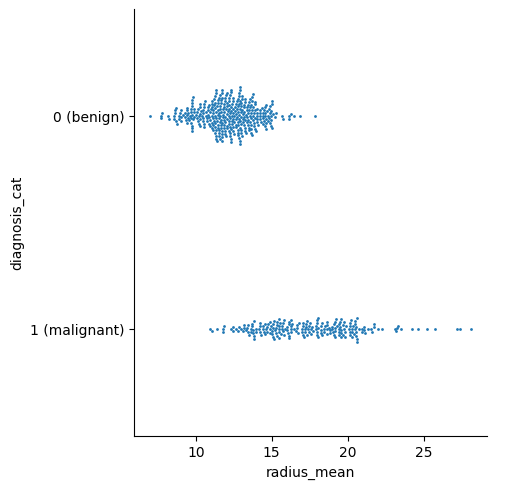

In [ ]:
sns.catplot(data=biopsy_data, x='radius_mean', y='diagnosis_cat',     # <- Required for plotting
            s=4, kind='swarm', order=['0 (benign)', '1 (malignant)']) # <- Optional for formatting

In [ ]:
#@markdown *How would you interpret what is going on in the chart above?*

answer = "When the size increases the chance of the cell being cancerous also increases. With cells that have a radios above 17-ish being always cancerous " # @param {"type":"string"}
handle_discussion_response(answer)

### *1.3.2. Discussion Exercise*
Try out some other features (`perimeter_mean`, `texture_mean`, `smoothness_mean`, etc.) to see how they relate to the diagnosis.

Feel free to run the code cell below for a quick view of the table, and use the other code cell for your exploration.

In [ ]:
biopsy_data.head(1)

,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis,diagnosis_cat
0,122.8,17.99,10.38,1001.0,0.1184,0.3001,0.2419,1,1 (malignant)


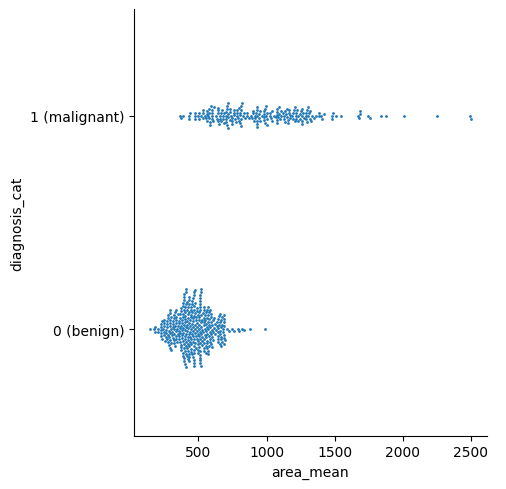

In [ ]:
sns.catplot(data=biopsy_data, x='area_mean', y='diagnosis_cat', s=4, kind='swarm')

In [ ]:
#@markdown *Which features seem like the best predictors?*

answer = "" # @param {"type":"string"}
handle_discussion_response(answer)

---
---
# **(Optional) 📏 Milestone 2: Using Linear Regression**

>Check out this section if you'd like to see how linear regression might not make sense for a classification problem. Feel free to skip in favor of talking more about classification concepts!

Let's use algorithm that we've seen before: linear regression! We'll focus first on `radius_mean` as our input.

We've provided the code to fit the linear regression in the cell below; run it and answer the questions below!





In [ ]:
#@markdown ### Run this to fit and visualize a linear regression
from sklearn import linear_model

X, y = biopsy_data[['radius_mean']], biopsy_data[['diagnosis']]

model = linear_model.LinearRegression()
model.fit(X, y)
preds = model.predict(X)

sns.scatterplot(data=biopsy_data, x='radius_mean', y='diagnosis', s=4)
plt.plot(X, preds, color='r')
plt.legend(['Data', 'Linear Regression Fit'])

### *2.1.1. Discussion Exercise*

Choose your answers from the dropdowns below, and run the cell to check your answers!

In [ ]:
#@markdown What does a `diagnosis` of 0.0 mean?
diagnosis_0 = "Choose An Answer" #@param ["Malignant", "Benign", "Choose An Answer"]

#@markdown What does a `diagnosis` of 1.0 mean?
diagnosis_1 = "Choose An Answer" #@param ["Malignant", "Benign", "Choose An Answer"]

#@markdown What does the model predict for `radius_mean` = 20?
radius_mean_20 = "Choose An Answer" #@param ["Malignant", "Benign", "Choose An Answer"]

#@markdown What does the model predict for `radius_mean` = 11?
radius_mean_11 = "Choose An Answer" #@param ["Malignant", "Benign", "Choose An Answer"]

if diagnosis_0 == 'Benign' and diagnosis_1 == 'Malignant':
  print("Correct! 0.0 is a benign prediction and 1.0 is malignant.")
else:
  print("One or both of our diagnoses' interpretations is incorrect. Try again!")

if radius_mean_20 == 'Malignant':
  print("Correct! Our model would predict that a biopsy with radius_mean = 20 is malignant.")
else:
  print("That's not quite what our model would predict for radius_mean = 20. Try again!")

if radius_mean_11 == 'Benign':
  print("Correct! Our model would predict that a biopsy with radius_mean = 11 is benign.")
else:
  print("That's not quite what our model would predict for radius_mean = 11. Try again!")

### *2.1.2. Discussion Exercise*



In [ ]:
#@markdown *Did this linear regression model do well?*

#@markdown ***Hint:*** *What would our linear regression model predict for a mean radius of 25? How about 30? Is this an appropriate output?*

answer = "" # @param {"type":"string"}
handle_discussion_response(answer)


---
---
# **📍 Milestone 3: Using a Simple Boundary Classifier**



The variable we are trying to predict is categorical, not continuous, so let's try using a classifier!

## 3.1. Introducing the Boundary Classifier



The simplest approach to classification is just drawing a boundary. Let's pick a boundary value for `radius_mean` and see how well it separates the data.

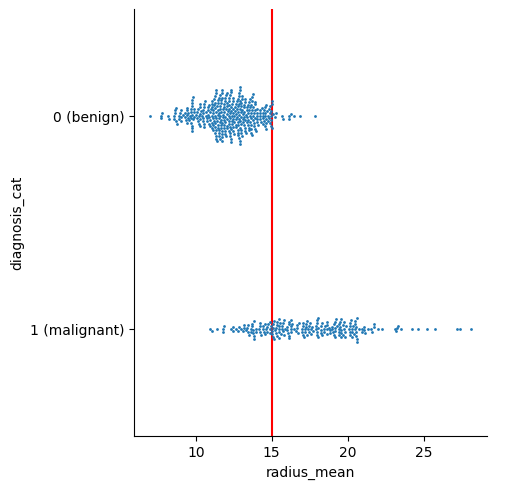

In [ ]:
#@title {run:"auto"}


#@markdown **Choose a value for your boundary line and click play!** You can see your chosen number on the right side of the slider. ➡
target_boundary = 15 #@param {type:"slider", min:5, max:30, step:0.1}

#@markdown Toggle this if you want to see the data in the `'swarm'` format (makes code slower)
swarm = True # @param {"type":"boolean","placeholder":"True"}

sns.catplot(data=biopsy_data,
            x='radius_mean',
            y='diagnosis_cat',
            s=4,
            kind=('swarm' if swarm else 'strip'),
            order=['0 (benign)', '1 (malignant)'])
plt.axvline(target_boundary, color='r')

### 3.1.1. Discussion Exercise



In [ ]:
#@markdown *1. What does it mean to be on the left or right side of this line?*
answer_1 = "the left would mean that the tumor is most likely benign" # @param {"type":"string"}

#@markdown *2. Does a boundary line separate the data well?*
answer_2 = "The right would mean the tumor is most likely cancerous " # @param {"type":"string"}

handle_discussion_response(answer_1, answer_2)

## 3.2. Building the Boundary Classifier

All we've done so far is draw a line; let's add in the predictions of the line into our dataset!


### 3.2.1. Coding Exercise

The boundary value you've chosen is saved as `target_boundary`. In order to get the predictions this boundary line would give, we can compare that `target_boundary` to one of the columns to see if those values fall below or above the boundary value. Fill in the code cell below to make that comparison!

If you're stumped, some hints are hidden below!
<details><summary> click to reveal hints! </summary>

1. Which column is relevant? How do we grab that out of the dataframe?
2. How can we compare that column to the boundary value in a way that gives us `True` for malignant predictions and `False` for benign?

In [ ]:
### YOUR CODE HERE
biopsy_data['radius_mean']>target_boundary

,radius_mean
0,True
1,True
2,True
3,False
4,True
...,...
564,True
565,True
566,True
567,True


### 3.2.2. Coding Exercise

Now that we've seen the predictions the `target_boundary` would make, let's add that prediction to the data! In the code cell below, make a new column called `'boundary_prediction'` using the column you just made above. Here's a template:

```python
DATAFRAME["NEW_COLUMN_NAME"] = NEW_COLUMN
```

Once you've added that line of code, add in another line to display the first five rows of the dataset to see what's changed!

In [ ]:
biopsy_data['boundary_prediction'] = biopsy_data['radius_mean']>target_boundary

Now that we have that column added in, we need to do one more step of converting the Boolean datatype (`True` / `False`) to the integer datatype we've been using (`0` / `1`) for easier comparison with the `'diagnosis'` column.

The provided code below does that for you. Give it a run and check out what's changed!

In [ ]:
biopsy_data["boundary_prediction"] = biopsy_data["boundary_prediction"].astype(int)
biopsy_data.head()

,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis,diagnosis_cat,boundary_prediction
0,122.80,17.99,10.38,1001.0,0.11840,0.3001,0.2419,1,1 (malignant),1
1,132.90,20.57,17.77,1326.0,0.08474,0.0869,0.1812,1,1 (malignant),1
2,130.00,19.69,21.25,1203.0,0.10960,0.1974,0.2069,1,1 (malignant),1
3,77.58,11.42,20.38,386.1,0.14250,0.2414,0.2597,1,1 (malignant),0
4,135.10,20.29,14.34,1297.0,0.10030,0.1980,0.1809,1,1 (malignant),1


## 3.3. Testing the Boundary Classifier with Accuracy

Let's take a look at the predictions vs. the actual diagnoses! In the code cell below, we assign these as `y_true` and `y_pred` (in other words, the true $y$ output and the predicted $y$ output). Run it to print them out and discuss what you notice.

In [ ]:
y_true = biopsy_data['diagnosis']
y_pred = biopsy_data['boundary_prediction']

print(list(y_true))
print(list(y_pred))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 

This comparison just gives us an idea of how well the model is doing, but instead of looking through all those predictions, we can just calculate the *percentage* of the data we predicted correctly.

This is known as the ***accuracy***, which we can easily calculate using the `accuracy_score()` function from the `sklearn` library, passing in the true labels (`y_true`) and predicted labels (`y_pred`) we'd like to compare:

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print(accuracy)

0.8892794376098418


How'd your chosen boundary do? Feel free to play around with the slider below, which will plot the chosen boundary as well as the predictions and accuracy! Once you've landed on your chosen boundary value with a high accuracy, complete the following discussion exercise.

Accuracy: 0.8804920913884007
----------------------------


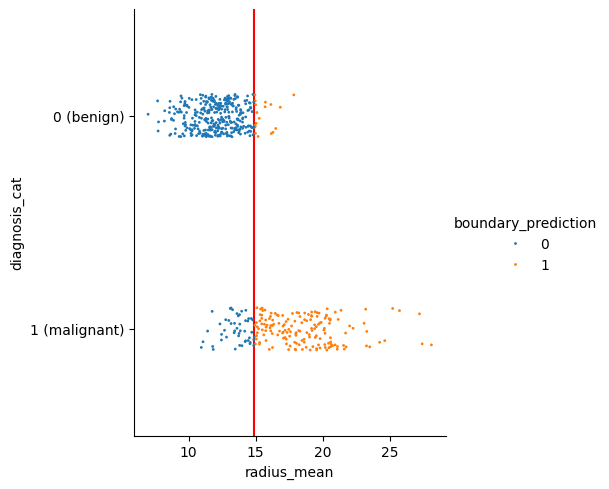

In [ ]:
#@title {run:'auto'}

#@markdown **Choose a value for your boundary line and click play!** You can see your chosen number on the right side of the slider. ➡
target_boundary = 14.9 #@param {type:"slider", min:5, max:30, step:0.1}

#@markdown Toggle this if you want to see the data in the `'swarm'` format (makes code slower)
swarm = False # @param {"type":"boolean","placeholder":"True"}

from sklearn.metrics import accuracy_score

# Update prediction column
biopsy_data["boundary_prediction"] = biopsy_data["radius_mean"] > target_boundary
biopsy_data["boundary_prediction"] = biopsy_data["boundary_prediction"].astype(int)

# Plot data with prediction information this time
sns.catplot(data=biopsy_data,
            x='radius_mean',
            y='diagnosis_cat',
            s=4,
            kind=('swarm' if swarm else 'strip'),
            order=['0 (benign)', '1 (malignant)'],
            hue='boundary_prediction')
plt.axvline(target_boundary, color='r')

# Get accuracy score
y_true = biopsy_data['diagnosis']
y_pred = biopsy_data['boundary_prediction']

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)
print("----------------------------")

### 3.3.1. Discussion Exercise

In [ ]:
#@markdown *1. With the points colored, it's easier to see where our model goes wrong. What are the two types of mistakes we're making? Which mistake are we making more of?*
answer_1 = "We give people the wrong diagnoses " # @param {"type":"string"}

#@markdown *2. What could go wrong with each kind of mistake?*
answer_2 = "" # @param {"type":"string"}

#@markdown *3. Which mistake might we prefer to avoid? Does our high-accuracy line agree with that?*
answer_3 = "" # @param {"type":"string"}

handle_discussion_response(answer_1, answer_2, answer_3)

## 3.4. Testing the Boundary Classifier with a Confusion Matrix

Having seen the different kinds of mistakes our model can make, an easier way to analyze those mistakes is through a confusion matrix! Try running the cell below and comparing the numbers you see to the plot from the previous section.

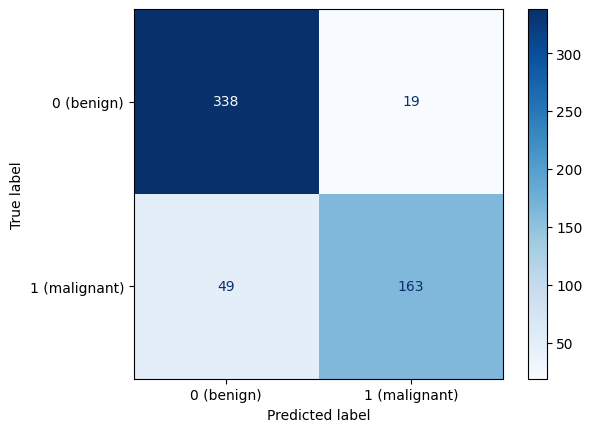

In [ ]:
#@markdown ### Run this to display the confusion matrix for your model!
cnf_matrix = confusion_matrix(y_true, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,
                              display_labels=['0 (benign)', '1 (malignant)'])
disp.plot(cmap='Blues')

### 3.4.1. Discussion Exercise

In [ ]:
#@markdown *Which squares correspond to correct predictions? What about the mistakes?*
answer = "" # @param {"type":"string"}

handle_discussion_response(answer)

### (Optional) Confusion Matrix Terminology
> Delve into this section if you want to learn the different names for each of these types of predictions.



Here's how we can interpret the confusion matrix:

<center>
<img src="https://miro.medium.com/max/860/1*7EcPtd8DXu1ObPnZSukIdQ.png">
</center>

where the terms mean:

* **TP (True Positive)** = The model predicted positive (malignant in our case, since malignant has a label of 1) and it's true.
* **TN (True Negative)** = The model predicted negative (benign in our case, since benign has a label of 0) and it's true.
* **FP (False Positive)** = The model predicted positive and it's false.
* **FN (False Negative)** = The model predicted negative and it's false.

An easier way to remember this: the **True vs. False** part tells us whether the model's prediction was correct, and the **Positive vs. Negative** part tells us what the model's guess was.

Note that the mistakes we discussed in the previous section corresponds to the False Positives (predicted malignant, actually benign) and False Negatives (predicted benign, actually malignant) in the matrix above!

---
---
# **📈 Milestone 4: Using Single Variable Logistic Regression**

Now, it's time to move away from our simple guess-and-check model and work towards implementing an approach that can automatically find a better separation. One of the most common methods for this is called ***logistic regression***.

## 4.1. Splitting the Data into Training and Testing Sets

We'll split up our data set into **training data** and **testing data**. We teach our model the patterns using the train data, but the whole point of machine learning is that our prediction should work on *unseen* data (the test data we set aside for testing the model *after* training)

The code cell below does this for you! We first choose our `X` and `y`, followed by using the `train_test_split()` function to randomly split the overall dataset into the two sets.

Based on the inputs to `train_test_split()`, can you guess how much of the data goes into the training vs. the testing data?

In [ ]:
from sklearn.model_selection import train_test_split

X = biopsy_data[['radius_mean']]
y = biopsy_data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Let's now take a look at the train and test groups in the next two code cells. Notice how the index (the row number) is randomly shuffled now! See if your guess for how much data goes in each was correct.


In [ ]:
print('Number of biopsies in train data:', len(X_train))
X_train.head()

Number of biopsies in train data: 455


,radius_mean
408,17.99
4,20.29
307,9.00
386,12.21
404,12.34


from matplotlib import pyplot as plt
_df_0['radius_mean'].plot(kind='hist', bins=20, title='radius_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['radius_mean'].plot(kind='line', figsize=(8, 4), title='radius_mean')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
print('Number of biopsies in test data:', len(X_test))
X_test.head()

Number of biopsies in test data: 114


,radius_mean
421,14.69
47,13.17
292,12.95
186,18.31
414,15.13


## 4.2. Initializing and Training the Logistic Regression Model

Now, let's prepare our model! We'll start by initializing it from the handy machine learning library `sklearn`.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression()

### 4.2.1. Coding Exercise

Next, we want to tell our `log_reg_model` object to take in our inputs and our true labels and fit the model on that information.

Can you place the model and training data variables correctly into this template to do this?

```python
MODEL.fit(TRAINING_INPUTS, TRAINING_OUTPUTS)
```



In [ ]:
### YOUR CODE HERE

log_reg_model.fit(X_train,y_train)

LogisticRegression()

## 4.3. Testing the Logistic Regression Model

How do we know if our model is actually *learning* anything beyond memorizing the data it was trained on? We can test it on the unseen data in the test data set!

### 4.3.1. Coding Exercise


Fill in the appropriate input to this function to get the predictions on the test data!

```python
y_pred = MODEL.predict(TESTING_INPUTS)
```

In [ ]:
### YOUR CODE HERE
y_pred = log_reg_model.predict(X_test)
print(y_pred)

[0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 0]


### 4.3.2. Coding Exercise

Finally, let's evaluate the accuracy of our model. Fill in the code cell below to do that!

*Hint*: How did we do this with the boundary classifier? What are our true labels this time around?

In [ ]:
### YOUR CODE HERE
accuracy_score(y_pred, y_test)


ValueError: Found input variables with inconsistent numbers of samples: [569, 114]

How does your model compare? Let's display the plot and confusion matrix below to get the best idea of how the model is doing.

In [ ]:
# @markdown ### Run this to visualize the results!
test_df = pd.DataFrame({'radius_mean': X_test['radius_mean'],
                        'diagnosis': y_test,
                        'log_reg_prediction': y_pred})
test_df['diagnosis_cat'] = test_df['diagnosis'].map({1: '1 (malignant)', 0: '0 (benign)'})
sns.catplot(data=test_df,
            x='radius_mean',
            y='diagnosis_cat',
            s=4,
            kind='swarm',
            order=['0 (benign)', '1 (malignant)'],
            hue='log_reg_prediction')

cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,
                              display_labels=['0 (benign)', '1 (malignant)'])
disp.plot(cmap='Blues')

### 4.3.3. Discussion Exercise

In [ ]:
#@markdown *1. How did we do compared to the predictions with the boundary classifier?*
answer_1 = "" # @param {"type":"string"}

#@markdown *2. Why does it look like there are fewer data points in this plot than with the boundary classifier?*
answer_2 = "" # @param {"type":"string"}

handle_discussion_response(answer_1, answer_2)


## 4.4. Logistic Regression Analysis

Let's take a closer look at what logistic regression is doing!

In [ ]:
#@markdown ### Run this to plot logistic regression's soft probabilities

y_prob = log_reg_model.predict_proba(X_test)
X_test_view = X_test['radius_mean'].values.squeeze()
plt.xlabel('radius_mean')
plt.ylabel('Predicted Probability')
sns.scatterplot(x=X_test_view, y=y_prob[:,1], hue=y_test, palette=['purple','green'], s=8, alpha=0.5)
plt.axhline(0.5, color='r', linestyle='--', linewidth=0.5)

The $y$-axis is the probability of being 'malignant' and the $x$-axis is the `radius_mean`. The colors show the **true** diagnosis, which is different than the previous graphs!


### 4.4.1. Discussion Exercise

In [ ]:
#@markdown *Can you interpret what the graph above is saying?*
answer = "" # @param {"type":"string"}

handle_discussion_response(answer)


---
---
# (Optional) 🕵 Milestone 5: Exploring Logistic Regression Further

> Try out this section if you want to try other individual features or combinations of features!

Now that we can use logistic regression to find the optimal classification boundary, let's try out other features and combinations to see how well they predict the diagnosis.

First let's print out one row of our table so we can see what other features we have available to us.


In [ ]:
biopsy_data.head(1)

## 5.1. Experimenting with Single-Variable Logistic Regression

### 5.1.1. Coding Exercise

First, let's practice what we've done already! Fill in the code below to prepare your data, fit the model on the training data, and predict on the test data.

Once you have this code working, try replacing `radius_mean` with other features to see how well each feature predicts diagnosis!

In [ ]:
X = biopsy_data[['radius_mean']] # Try changing radius_mean later!
y = biopsy_data['diagnosis']

# 1. Split data into train and test

# 2. Initialize the model object

# 3. Fit the model to the training data

# 4. Use this trained model to predict on the test data

# 5. Evaluate the accuracy by comparing to to the test labels and print out accuracy.


In [ ]:
#@markdown ### Run this to display the confusion matrix!
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,
                              display_labels=['0 (benign)', '1 (malignant)'])
disp.plot(cmap='Blues')

### 5.1.2. Discussion Exercise

In [ ]:
#@markdown *Which features best predicted diagnosis? What does this teach us about breast cancer?*
answer = "" # @param {"type":"string"}

handle_discussion_response(answer)

## 5.2. Experimenting with Multivariable Logistic Regression

So far, we've just been using `radius_mean` to make predictions. But there's plenty of other potentially important features that we could be using!

Let's take a look again:

In [ ]:
biopsy_data.head(1)

### 5.2.1. Coding Exercise

Now that you've written the code to experiment with a single feature, it should be easy to experiment with multiple features! For example, instead of

```python
X = biopsy_data[['radius_mean']]
```

you can add in other features to the list to train on more features, like so:

```python
X = biopsy_data[['radius_mean', 'area_mean']]
```

Alter your code above and try to find the best combination!

In [ ]:
#@markdown *What's the best combination you could find?*
answer = "" # @param {"type":"string"}

handle_discussion_response(answer)

---
---
# (Optional) ⚖️ Milestone 6: More on Classification Metrics
> Try out this section if you'd like to learn more about accuracy, precision and recall!

Depending on the situation, we might measure success in different ways. For example, we might use:

- **Accuracy:** What portion of our predictions are right?

- **Precision:** What portion of our positive predictions are actually positive?

- **Recall:** What portion of the actual positives did we identify?



### 6.1.1. Discussion Exercise

In [ ]:
#@markdown *Which metric is most important for cancer diagnosis?*
answer = "" # @param {"type":"string"}

handle_discussion_response(answer)

To calculate any of these, we can use the numbers from our confusion matrix:

In [ ]:
#@markdown ### Run this to display the confusion matrix and counts of negatives vs. positives!
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,
                              display_labels=['0 (benign)', '1 (malignant)'])
disp.plot(cmap='Blues')

(tn, fp), (fn, tp) = cnf_matrix
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

### 6.1.2. Coding Exercise

Now, calculate your model's performance by your chosen metric! You can use the [table on Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix#Table_of_confusion) to choose a metric and find a formula. How does it change your view of your model?


In [ ]:
### YOUR CODE HERE

---
---
# (Optional) 🌳 Milestone 7: Trying Out a Decision Tree

>Try looking through this brief section if you'd like to try out a decision tree on this data!

Let's try a different classification model: decision trees! Recall that with decision trees, we choose features and decisions that create the best splits of our dataset (separates it into classes as best it can at that time).

The code in this section has been provided for you! We first start by creating, training, and visualizing the model. Run the cell below to see the tree that's produced.

In [ ]:
# Necessary imports
from sklearn.tree import DecisionTreeClassifier, plot_tree

# We'll first specify what model we want, in this case a decision tree with a
# maximum depth (or maximum number of splits) of 3
decision_tree = DecisionTreeClassifier(max_depth=3)

# We use our previous `X_train` and `y_train` sets to build the model
decision_tree.fit(X_train, y_train)

# Visualizing the model
plt.figure(figsize=(13,8))  # set plot size
plot_tree(decision_tree, fontsize=10);

With the model trained, we can now interpret the results using the various metrics explained in the previous milestone.

Run the cell below to see how well the model did, and feel free to play around with the `max_depth` parameter to see how you can improve the model!

In [ ]:
# Necessary imports
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Getting predictions
y_pred = decision_tree.predict(X_test)

# Printing results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

### 7.1.1. Discussion Exercise

  

In [ ]:
#@markdown *1. What features are included in this classifier?*
answer_1 = "" # @param {"type":"string"}

#@markdown *2. How might you interpret this tree?*
answer_2 = "" # @param {"type":"string"}

#@markdown *3. Did this do better than the logistic regression?*
answer_3 = "" # @param {"type":"string"}

handle_discussion_response(answer_1, answer_2, answer_3)

---
---
# (Optional Challenge) 📚 Milestone 8: Using More Advanced Classifiers

>Try out this section if you'd like to try more advanced classification models beyond logistic regression and decision trees.

In [ ]:
#@markdown ### Run this to import classifiers
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, WhiteKernel
kernal = 1.0 * RBF(length_scale=1e-1, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel( noise_level=1e-2, noise_level_bounds=(1e-10, 1e1))

### 8.1.1. Coding Exercise

We've studied two common classifiers, but many more are available. You can read about some of them [here](https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/).

Let's try to choose the overall best classifier for this dataset. Fill in the code below to:
*   Use a for loop to train and evaluate each classifer in the list on our dataset.
*   Calculate the precision, recall, and accuracy on the test set for each classifier, and store the results in a dataframe so it's easy to analyze.
*   Create plots to show the relationships between precision, accuracy, and recall and help you choose the "best" classifier.

Then experiment with changing the hyperparameters (options) of each classifier - can you get even better results?

In [ ]:
# Once you've got your code working, try changing the hyperparameters of the classifiers
# to see if you can get even better results.
# Can you find out what the hyperparameters mean?
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


# Use a for loop to train and test each classifier, and print the results
# You might find the code above useful, as well as https://towardsdatascience.com/a-python-beginners-look-at-loc-part-2-bddef7dfa7f2 .

### YOUR CODE HERE ###




### END CODE ###



# Using pyplot, show the relationships between precision, recall, and/or accuracy.
# Tutorial here: https://matplotlib.org/tutorials/introductory/pyplot.html

### YOUR CODE HERE ###




### END CODE ###

**Think about:**
*   Which classifier would you choose?
*   Can you find more successful hyperparameters for each classifer?

Your experiments will help you find a classifier that works very well on our test set. However, you're running a risk by doing so much manual fine-tuning: you might end up "overfitting" (on a more meta level) by choosing a classifier that works well on your test set, but might not work well on other data.

That's why most machine learning projects actually use [*three* datasets](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7): a training set that we use to train each candidate model; a validation set that we use to evaluate each candidate model and choose the best one; and finally, a test set which we use only once, to report the overall performance of our project.




---
---

# 🤔 Knowledge Check

Great job getting through this notebook! If you have time, feel free to go back to the optional sections before this section to delve deeper.

Feel free to use the below questions to ensure you've learned everything from this notebook!




In [ ]:
#@markdown *1. What are the steps required to make our model and get its results on a dataset?*
answer_1 = "" # @param {"type":"string"}

#@markdown *2. Why do we split our data into training and testing sets instead of using all of it to train the model?*
answer_2 = "" # @param {"type":"string"}

#@markdown *3. What does a confusion matrix tell us that accuracy does not?*
answer_3 = "" # @param {"type":"string"}

#@markdown *4. If logistic regression is a regression (predicts a number), how are we using this model for classification?*
answer_4 = "" # @param {"type":"string"}

handle_discussion_response(answer_1, answer_2, answer_3, answer_4)

If you went through the optional/advanced sections, you can try these questions out too!

In [ ]:
#@markdown *1. Why is linear regression not a good model for our goal of predicting diagnosis?*
answer_1 = "" # @param {"type":"string"}

#@markdown *2. What's the difference between single-variable and multivariable logistic regression?*
answer_2 = "" # @param {"type":"string"}

#@markdown *3. How does a decision tree fit to the training data?*
answer_3 = "" # @param {"type":"string"}

handle_discussion_response(answer_1, answer_2, answer_3)

---
---

# 📋 Cheat Sheets

Feel free to use the following cheat sheets as a quick reference!

- [Pandas Cheat Sheet](https://docs.google.com/document/d/1NK3wvy9pnpg6vab6AkdzLwGSsNf31NSIsrEYz1IVljk/edit?pli=1&tab=t.orx50ha0fjl)
- [Seaborn Cheat Sheet](https://docs.google.com/document/d/1NK3wvy9pnpg6vab6AkdzLwGSsNf31NSIsrEYz1IVljk/edit?pli=1&tab=t.e55d63tet353)
- [Scikit-learn Pipeline Cheat Sheet](https://docs.google.com/document/d/1NK3wvy9pnpg6vab6AkdzLwGSsNf31NSIsrEYz1IVljk/edit?tab=t.53r5m2rr4htd)
- [Scikit-learn Models Cheat Sheet](https://docs.google.com/document/d/1NK3wvy9pnpg6vab6AkdzLwGSsNf31NSIsrEYz1IVljk/edit?pli=1&tab=t.ievqibqbhol1)

Note that there are more cheat sheets on this document that aren't relevant until later in the program, but feel free to start looking through everything!